In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to show graphs in jupyter notebook not in external tab

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels as st

from ydata_profiling import ProfileReport

import category_encoders as ce

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.tree import DecisionTreeClassifier,

from sklearn.model_selection import GridSearchCV

In [2]:
# plot size
plt.rcParams['figure.figsize']=[15,8]

In [3]:
# Problem Statement
# The goal here is to train a binatu classifier on the training dataset to predict the expense columns

In [4]:
# load dataset
df_expenses = pd.read_csv('Expence.csv')
df_expenses

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,38,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
4996,26,Private,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,40,United-States,<=50K
4997,20,Private,11th,7,Never-married,Transport-moving,Own-child,White,Male,0,0,60,United-States,<=50K
4998,24,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,Mexico,>50K


In [5]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [6]:
df_expenses.nunique()

age               69
workclass          9
education         16
education-num     16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
capital-gain      83
capital-loss      57
hours-per-week    74
native-country    40
Expense            2
dtype: int64

In [7]:
df_expenses.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

In [8]:
df_expenses.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.656000,10.065000,1104.080000,90.032800,40.566200
std,13.698292,2.558141,7579.674371,404.168991,12.154191
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3004.000000,99.000000


In [9]:
df_expenses['workclass'].value_counts()

 Private             3444
 Self-emp-not-inc     385
 ?                    320
 Local-gov            318
 State-gov            199
 Self-emp-inc         184
 Federal-gov          148
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64

In [10]:
# label encoding is not applicable

In [11]:
# decision tree can work with missing values and outliers, if these are not treated, decision tree is not bothered

In [12]:
cols = list(df_expenses.select_dtypes(include = np.object).columns)
for i in cols:
    print(df_expenses[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0        Self-emp-inc
1             Private
2             Private
3           State-gov
4           Local-gov
            ...      
4995          Private
4996          Private
4997          Private
4998          Private
4999          Private
Name: workclass, Length: 5000, dtype: object>
<bound method IndexOpsMixin.value_counts of 0           Bachelors
1        Some-college
2           Doctorate
3             HS-grad
4           Bachelors
            ...      
4995          HS-grad
4996     Some-college
4997             11th
4998          HS-grad
4999          HS-grad
Name: education, Length: 5000, dtype: object>
<bound method IndexOpsMixin.value_counts of 0        Married-civ-spouse
1             Never-married
2        Married-civ-spouse
3        Married-civ-spouse
4             Never-married
               ...         
4995     Married-civ-spouse
4996          Never-married
4997          Never-married
4998     Married-civ-spouse
4999        

In [13]:
df_expenses['education'].value_counts()

 HS-grad         1602
 Some-college    1142
 Bachelors        823
 Masters          259
 Assoc-voc        214
 11th             179
 Assoc-acdm       157
 10th             156
 7th-8th          105
 Prof-school       90
 9th               84
 12th              57
 Doctorate         56
 5th-6th           46
 1st-4th           25
 Preschool          5
Name: education, dtype: int64

In [14]:
# frequency encoding is applicable

In [15]:
# martial status
# fequency encoding is applicable
# label encoding is not applicable
# target encoding , oone hot encoding

In [16]:
# occupation
# feaquency, target , one hot encoding is applicable

In [17]:
# relations
# one hot, fequency, target enconding is applicable

In [18]:
# race
# target, one hot, frequency encoding is applicable

In [19]:
# country
# target encoding is applicable

In [20]:
# target
# manual encoding 0,1

In [21]:
# no missing values in dataset but garbage

In [22]:
df_expenses.std()

age                 13.698292
education-num        2.558141
capital-gain      7579.674371
capital-loss       404.168991
hours-per-week      12.154191
dtype: float64

In [23]:
report = ProfileReport(df_expenses)
report.to_file(output_file='Report_Expenses.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
# missing values
df_expenses[df_expenses == ' ?'] = np.nan

In [25]:
df_expenses.isnull().sum()

age                 0
workclass         320
education           0
education-num       0
marital-status      0
occupation        321
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     98
Expense             0
dtype: int64

In [26]:
(df_expenses.isnull().sum()/(df_expenses.index.size)*100).sort_values(ascending=False)

occupation        6.42
workclass         6.40
native-country    1.96
age               0.00
education         0.00
education-num     0.00
marital-status    0.00
relationship      0.00
race              0.00
sex               0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
Expense           0.00
dtype: float64

In [27]:
objects = df_expenses.select_dtypes('object').columns

In [28]:
num_cols = df_expenses.select_dtypes(include = np.number)

In [29]:
num_cols.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [30]:
num_cols = num_cols.drop('education-num', axis = 1)

In [31]:
num_cols.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0)

# fit in the objects

imputer=imputer.fit(df_expenses[objects].loc[:,:])

# df_expenses = pd.DataFrame(df_expenses_trans, columns = df_expenses.columns

In [33]:
imputer

SimpleImputer(strategy='most_frequent')

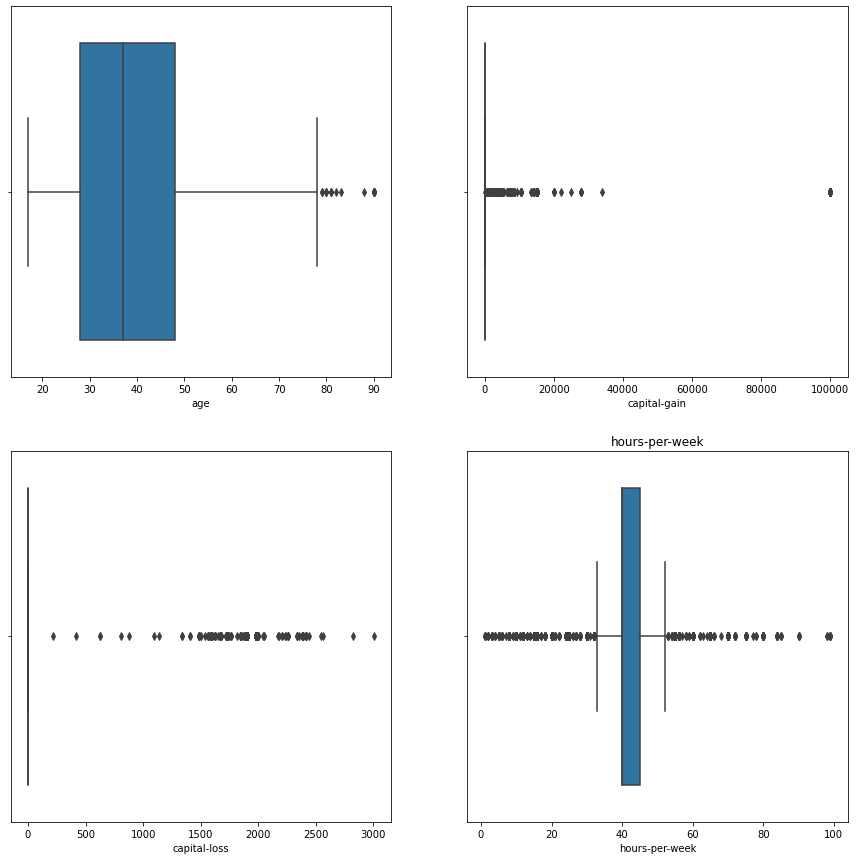

In [34]:
fig, ax=plt.subplots(2,2,figsize=(15,15))
for var, subplot in zip(num_cols.columns,ax.flatten()):
    sns.boxplot(num_cols[var],ax=subplot)
    plt.title(var)
plt.tight_layout
plt.show()

In [35]:
# target distibuted 
df_expenses['Expense'].unique()

array([' >50K', ' <=50K'], dtype=object)

In [36]:
df_expenses['Expense'] = df_expenses['Expense'].map({' <=50K':0, ' >50K':1})

In [37]:
df_expenses['Expense'].value_counts(normalize=True)*100

0    75.52
1    24.48
Name: Expense, dtype: float64

In [38]:
# correlation matrix for numeric data

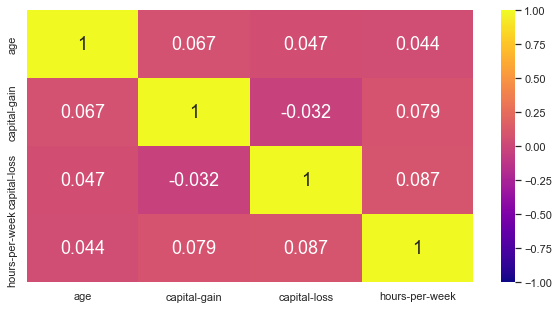

In [39]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.heatmap(num_cols.corr(),
            cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot = True,
            annot_kws={"size": 18})
plt.show()

In [40]:
cat_columns = df_expenses.select_dtypes(object).columns
cat_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [41]:
# encoding of categorical variables

In [42]:
# WOE - weight of evidence -  it is based on the target variable

In [43]:
encoder = ce.WOEEncoder(cols = cat_columns)
encoder_data = encoder.fit_transform(df_expenses[cat_columns], df_expenses['Expense'])

In [44]:
encoder_data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,1.539872,0.725021,0.968321,1.037001,0.937510,0.085567,0.302285,0.020539
1,-0.103603,-0.384527,-1.902022,-1.934122,-3.146165,0.085567,0.302285,0.020539
2,-0.103603,2.367151,0.968321,0.980256,0.937510,0.085567,0.302285,0.020539
3,0.149164,-0.368765,0.968321,0.980256,1.289741,0.085567,-0.863275,0.020539
4,0.124464,0.725021,-1.902022,0.980256,-3.146165,0.085567,-0.863275,0.020539
...,...,...,...,...,...,...,...,...
4995,-0.103603,-0.368765,0.968321,-0.677132,0.937510,0.085567,0.302285,0.020539
4996,-0.103603,-0.384527,-1.902022,0.527601,-3.146165,0.085567,-0.863275,0.020539
4997,-0.103603,-1.519554,-1.902022,-0.155496,-3.146165,0.085567,0.302285,0.020539
4998,-0.103603,-0.368765,0.968321,-0.007220,0.937510,0.085567,0.302285,-1.503363


In [45]:
num_cols = df_expenses.select_dtypes(int).columns
num_cols

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Expense'],
      dtype='object')

In [46]:
df_salary = pd.concat([pd.DataFrame(df_expenses[num_cols]), encoder_data], axis=1)
df_salary.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Expense,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,13,15024,0,50,1,1.539872,0.725021,0.968321,1.037001,0.937510,0.085567,0.302285,0.020539
1,20,10,0,0,40,0,-0.103603,-0.384527,-1.902022,-1.934122,-3.146165,0.085567,0.302285,0.020539
2,50,16,0,1902,65,1,-0.103603,2.367151,0.968321,0.980256,0.937510,0.085567,0.302285,0.020539
3,38,9,0,0,40,1,0.149164,-0.368765,0.968321,0.980256,1.289741,0.085567,-0.863275,0.020539
4,23,13,0,0,60,0,0.124464,0.725021,-1.902022,0.980256,-3.146165,0.085567,-0.863275,0.020539


In [47]:
# model with KNN and neural network requires scaling, we are not using this so we are not scaling the data

In [48]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   education-num   5000 non-null   int64  
 2   capital-gain    5000 non-null   int64  
 3   capital-loss    5000 non-null   int64  
 4   hours-per-week  5000 non-null   int64  
 5   Expense         5000 non-null   int64  
 6   workclass       5000 non-null   float64
 7   education       5000 non-null   float64
 8   marital-status  5000 non-null   float64
 9   occupation      5000 non-null   float64
 10  relationship    5000 non-null   float64
 11  race            5000 non-null   float64
 12  sex             5000 non-null   float64
 13  native-country  5000 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 547.0 KB


In [49]:
# building the models now

In [50]:
Y=df_salary.Expense
X=df_salary[['age','sex',
               'capital-gain','capital-loss', 'hours-per-week',
               'native-country','occupation', 'workclass',
               'relationship','race', 'marital-status', 'education']]           

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify= Y, random_state=0)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 12), (1500, 12), (3500,), (1500,))

In [53]:
# logistic regression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr_train = lr.predict(x_train)
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
print('accuracy_score', accuracy_score(y_test, y_pred_lr))
print('confusion metric')
print(confusion_matrix(y_test, y_pred_lr))
print('classification report')
print(classification_report(y_test, y_pred_lr))

accuracy_score 0.8426666666666667
confusion metric
[[1061   72]
 [ 164  203]]
classification report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1133
           1       0.74      0.55      0.63       367

    accuracy                           0.84      1500
   macro avg       0.80      0.74      0.77      1500
weighted avg       0.83      0.84      0.83      1500



In [55]:
# recall is actual
# precision is predicted
# f1 is harmonic mean of 2 time the recall and precision, mathematical function

In [56]:


perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )
def per_measures(model,test,pred):
    accuracy    =accuracy_score(test,pred)
    f1score     = f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
  # aic         =model.aic
  # reliability = cohen_kappa_score(test,pred)
    return (accuracy,recall,precision,f1score,)
  
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [57]:
update_performance(name = 'Logisticreg-skl', model = lr, test = y_test , pred=y_pred_lr)

In [58]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg-skl,0.842667,0.553134,0.738182,0.632399


In [59]:
# naive bayes

gnb = GaussianNB()

In [60]:
gnb.fit(x_train, y_train)
y_pred_gnb_train = gnb.predict(x_train)
y_pred_gnb = gnb.predict(x_test)
y_pred_gnb

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
update_performance(name = 'GNB', model = gnb, test = y_test , pred=y_pred_gnb)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg-skl,0.842667,0.553134,0.738182,0.632399
1,GNB,0.823333,0.517711,0.683453,0.589147


In [62]:
# bernouli NB

In [63]:
bnb = BernoulliNB()

In [64]:
bnb.fit(x_train, y_train)
y_pred_bnb_train = bnb.predict(x_train)
y_pred_bnb = bnb.predict(x_test)
y_pred_bnb

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [65]:
update_performance(name = 'BNB', model = bnb, test = y_test , pred=y_pred_bnb)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg-skl,0.842667,0.553134,0.738182,0.632399
1,GNB,0.823333,0.517711,0.683453,0.589147
2,BNB,0.801333,0.673025,0.581176,0.623737


In [66]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt_train = bnb.predict(x_train)
y_pred_dt = bnb.predict(x_test)
y_pred_dt

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [67]:
update_performance(name = 'Decision Tree', model = dt, test = y_test , pred=y_pred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg-skl,0.842667,0.553134,0.738182,0.632399
1,GNB,0.823333,0.517711,0.683453,0.589147
2,BNB,0.801333,0.673025,0.581176,0.623737
3,Decision Tree,0.801333,0.673025,0.581176,0.623737


In [68]:
# using hyper parameter

In [69]:
tuned_paramaters = [{'criterion': ['entropy','gini'],
                     'max_depth': [5,10],  # 5,6,7,
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8], # 1-3% of the total records
                     'min_samples_leaf': [1,5,9], # 1-3% of the min_sample_split
                     'max_leaf_nodes': [5,8]}]

In [70]:
dt_n = DecisionTreeClassifier(random_state=10)

In [71]:
tree_grid = GridSearchCV(estimator=dt_n, param_grid=tuned_paramaters, cv=5)

In [72]:
tree_grid_model = tree_grid.fit(x_train, y_train)
print('best Parameters for decision tree classifier:', tree_grid_model.best_params_,'\n')

best Parameters for decision tree classifier: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [73]:
dt_grid_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_features= 'sqrt', max_leaf_nodes= 8,\
                                       min_samples_leaf= 1, min_samples_split= 2)

In [74]:
dt_grid_model = dt_grid_model.fit(x_train, y_train)
y_pred_dt_tp = dt_grid_model.predict(x_test)
y_pred_dt_tp

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [75]:
update_performance(name = 'Decision Tree tunned', model = dt_grid_model, test = y_test , pred=y_pred_dt_tp)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg-skl,0.842667,0.553134,0.738182,0.632399
1,GNB,0.823333,0.517711,0.683453,0.589147
2,BNB,0.801333,0.673025,0.581176,0.623737
3,Decision Tree,0.801333,0.673025,0.581176,0.623737
4,Decision Tree tunned,0.83,0.542234,0.695804,0.609495


In [76]:
## Random Forest

In [77]:
params =             [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [100],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [5, 9],
                     'max_leaf_nodes': [8, 11]}]

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf =RandomForestClassifier(random_state=10)

rf_cv = GridSearchCV(rf,params,cv=5,scoring='accuracy')

rf_cv.fit(x_train,y_train)

rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'n_estimators': 100}

In [83]:
rf_model = RandomForestClassifier(criterion ='entropy' ,
                                  n_estimators =100 ,
                                  max_depth = 10 ,
                                  max_features = 'sqrt',
                                  max_leaf_nodes =11 ,
                                  min_samples_leaf =9 ,
                                  min_samples_split = 2,
                                  random_state = 10)

In [84]:
rf_model.fit(x_train,y_train)

ypred_rf_tp = rf_model.predict(x_test)

In [85]:
update_performance(name='Random-forest tunned',model=rf_model,test=y_test,pred=ypred_rf_tp)

# Print the Dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg-skl,0.842667,0.553134,0.738182,0.632399
1,GNB,0.823333,0.517711,0.683453,0.589147
2,BNB,0.801333,0.673025,0.581176,0.623737
3,Decision Tree,0.801333,0.673025,0.581176,0.623737
4,Decision Tree tunned,0.83,0.542234,0.695804,0.609495
5,Random-forest tunned,0.854,0.53406,0.803279,0.641571


In [86]:
from sklearn.ensemble import BaggingClassifier

In [87]:
dt = DecisionTreeClassifier(random_state=10)

bc = BaggingClassifier(dt)

bc.fit(x_train,y_train)

ypred_bc = bc.predict(x_test)

In [88]:
update_performance(name='Bagging Classifier',model=bc,test=y_test,pred=ypred_bc)

# Print the Dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg-skl,0.842667,0.553134,0.738182,0.632399
1,GNB,0.823333,0.517711,0.683453,0.589147
2,BNB,0.801333,0.673025,0.581176,0.623737
3,Decision Tree,0.801333,0.673025,0.581176,0.623737
4,Decision Tree tunned,0.83,0.542234,0.695804,0.609495
5,Random-forest tunned,0.854,0.53406,0.803279,0.641571
6,Bagging Classifier,0.836667,0.553134,0.714789,0.623656


In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
abc1 = AdaBoostClassifier(dt,random_state=10)

abc1.fit(x_train,y_train)

ypred_abc1 = abc1.predict(x_test)

In [92]:
update_performance(name='Adaboost',model=abc1,test=y_test,pred=ypred_abc1)

# Print the Dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg-skl,0.842667,0.553134,0.738182,0.632399
1,GNB,0.823333,0.517711,0.683453,0.589147
2,BNB,0.801333,0.673025,0.581176,0.623737
3,Decision Tree,0.801333,0.673025,0.581176,0.623737
4,Decision Tree tunned,0.83,0.542234,0.695804,0.609495
5,Random-forest tunned,0.854,0.53406,0.803279,0.641571
6,Bagging Classifier,0.836667,0.553134,0.714789,0.623656
7,Adaboost,0.809333,0.531335,0.631068,0.576923


In [93]:
from xgboost import XGBClassifier

In [94]:
xgb = XGBClassifier(booster='gbtree',gamma=3,max_depth=3,min_child_weight=3,
                    n_estimator=50,reg_lambda=1,random_state=10)    # min_child_weight --> Cover

xgb.fit(x_train,y_train)

ypred_xgb = xgb.predict(x_test)

In [95]:
update_performance(name='XGBoost',model=xgb,test=y_test,pred=ypred_xgb)

# Print the Dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logisticreg-skl,0.842667,0.553134,0.738182,0.632399
1,GNB,0.823333,0.517711,0.683453,0.589147
2,BNB,0.801333,0.673025,0.581176,0.623737
3,Decision Tree,0.801333,0.673025,0.581176,0.623737
4,Decision Tree tunned,0.83,0.542234,0.695804,0.609495
5,Random-forest tunned,0.854,0.53406,0.803279,0.641571
6,Bagging Classifier,0.836667,0.553134,0.714789,0.623656
7,Adaboost,0.809333,0.531335,0.631068,0.576923
8,XGBoost,0.862667,0.621253,0.772881,0.688822
